# Exploring data and Pre-Processing

__import_library__

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as stl
import seaborn as sns

In [2]:
Train = pd.read_csv("../input/traintest/Train.csv")   


In [3]:
Test = pd.read_csv("../input/traintest/Test.csv")

In [4]:
Train.head()

,ID,Espèce,LongueurVer,LongueurDia,LongueurCro,Hauteur,Largeur,Poids
0,hAmkM80XrB,Dorade,30.9,33.5,38.6,15.6330,5.1338,610.0
1,j5tRKxc3P4,Éperlan,9.3,9.8,10.8,1.7388,1.0476,6.7
2,w2M3CLts3v,Brochet,48.3,51.7,55.1,8.9262,6.1712,950.0
3,9XCIhKuBo3,Gardon,17.5,18.8,21.2,5.5756,2.9044,78.0
4,xb0n1Eyv8Y,Perche,19.0,21.0,22.5,5.6925,3.5550,110.0


In [5]:
Test.head()

,ID,Espèce,LongueurVer,LongueurDia,LongueurCro,Hauteur,Largeur
0,5gLYcjsz9z,Perche,23.5,25.6,27.0,6.5610,4.2390
1,j0rBCrMwYa,Dorade,31.8,35.0,40.6,15.4686,6.1306
2,GI72jxWh7u,Perche,25.0,26.5,28.0,7.1680,4.1440
3,YJNyDH3z1V,Brochet,30.0,32.3,34.8,5.5680,3.3756
4,y98GtegfKY,Perche,20.0,22.0,23.5,5.6400,3.5250


here we can see some info about the data and it's type

In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           123 non-null    object 
 1   Espèce       123 non-null    object 
 2   LongueurVer  122 non-null    float64
 3   LongueurDia  121 non-null    float64
 4   LongueurCro  123 non-null    float64
 5   Hauteur      122 non-null    float64
 6   Largeur      122 non-null    float64
 7   Poids        123 non-null    float64
dtypes: float64(6), object(2)
memory usage: 7.8+ KB


some statistical insights about the data

In [7]:
Train.describe()

,LongueurVer,LongueurDia,LongueurCro,Hauteur,Largeur,Poids
count,122.000000,121.000000,123.000000,122.000000,122.000000,123.000000
mean,26.082787,28.566942,31.351220,8.800984,4.392384,402.913008
std,10.968405,11.497763,12.669231,4.225893,1.765300,374.588150
min,0.000000,8.400000,0.000000,1.728400,0.000000,5.700000
25%,19.000000,21.000000,22.650000,5.992400,3.399375,120.000000
50%,24.000000,26.500000,29.300000,7.806200,4.277050,273.000000
75%,33.650000,36.500000,40.950000,11.931750,5.783625,605.000000
max,59.000000,63.400000,68.000000,18.957000,8.142000,1650.000000


In [8]:
Train.shape

(123, 8)

we notice that the "ID" column is not necessary for our model so we choose to drop it

In [9]:
Train=Train.drop("ID", axis=1)

# Visualization of data

In [10]:
stl.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [11]:
stl.use('ggplot')

__General insights about numerical data__

In [12]:
Train.head()

,Espèce,LongueurVer,LongueurDia,LongueurCro,Hauteur,Largeur,Poids
0,Dorade,30.9,33.5,38.6,15.6330,5.1338,610.0
1,Éperlan,9.3,9.8,10.8,1.7388,1.0476,6.7
2,Brochet,48.3,51.7,55.1,8.9262,6.1712,950.0
3,Gardon,17.5,18.8,21.2,5.5756,2.9044,78.0
4,Perche,19.0,21.0,22.5,5.6925,3.5550,110.0


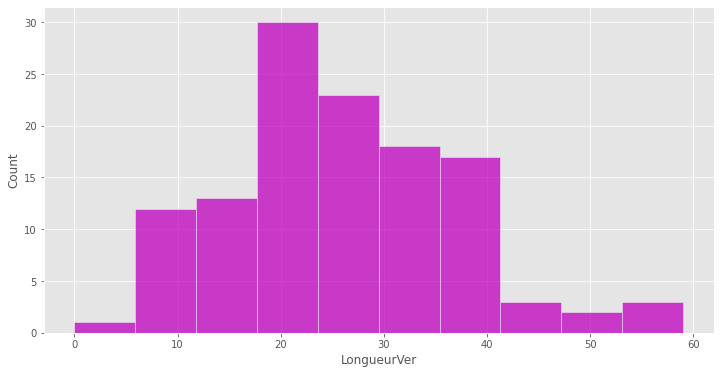

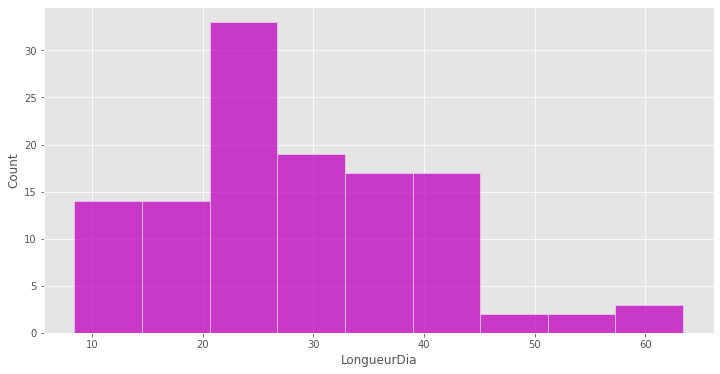

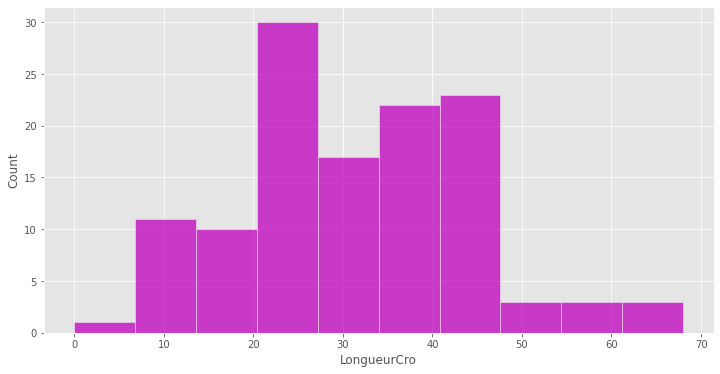

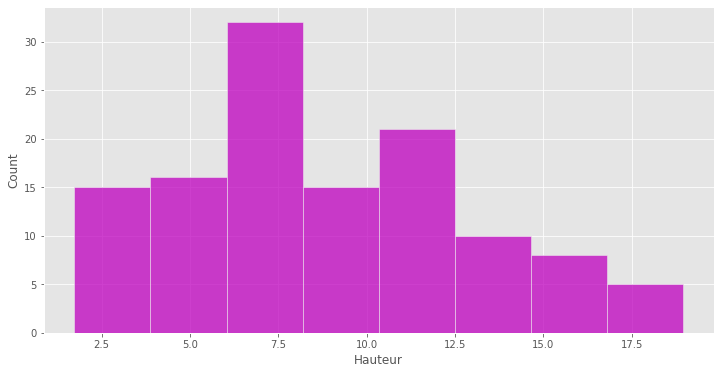

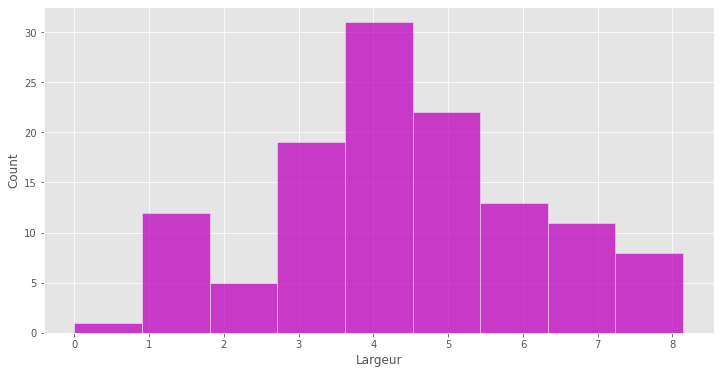

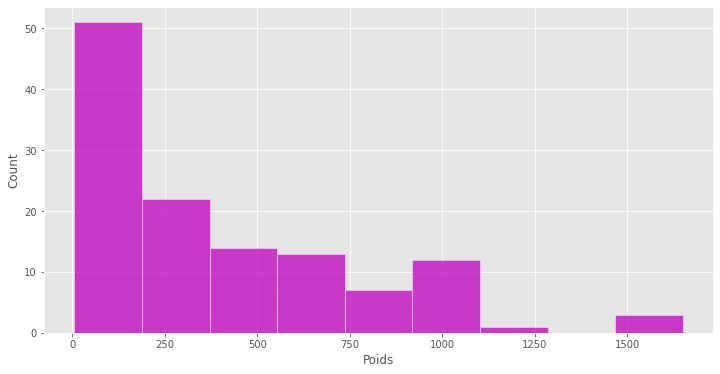

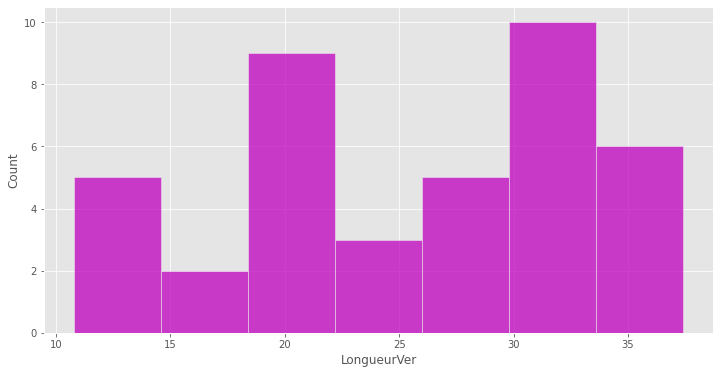

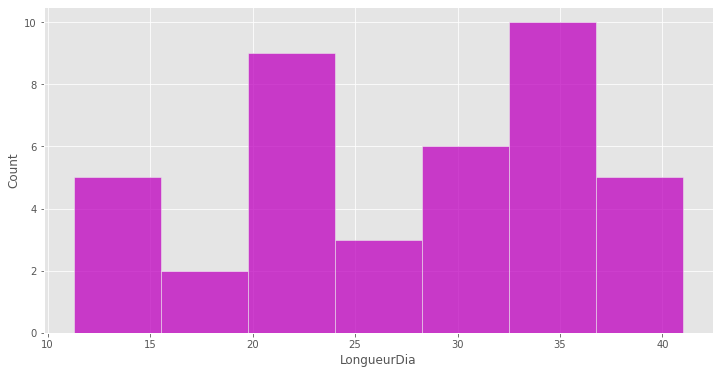

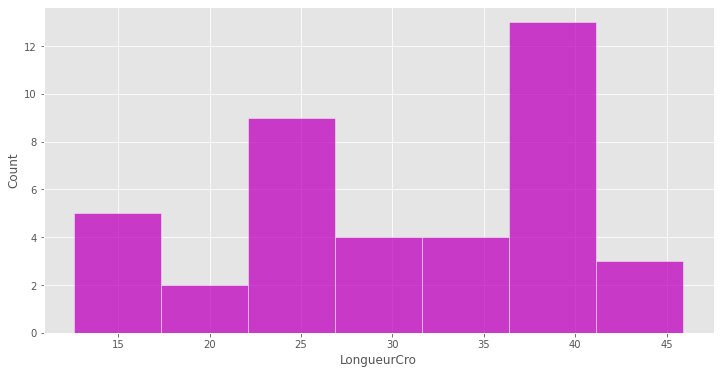

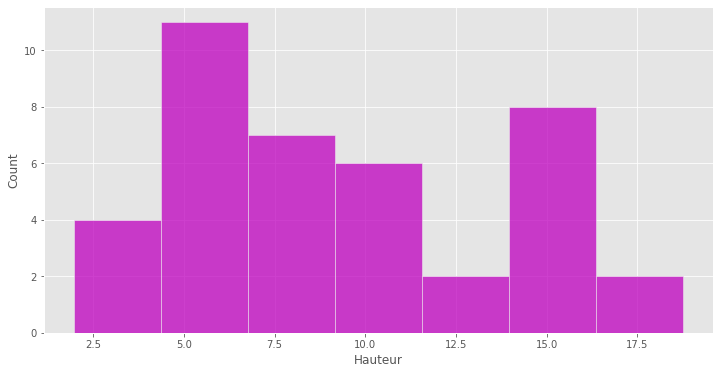

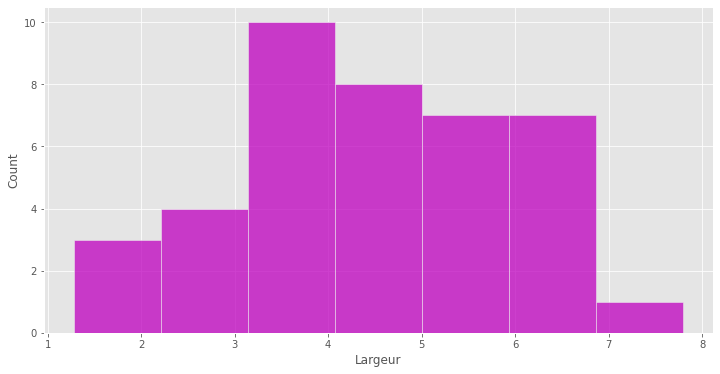

In [13]:
numerical=["LongueurVer","LongueurDia","LongueurCro","Hauteur","Largeur","Poids"]
numericalt=["LongueurVer","LongueurDia","LongueurCro","Hauteur","Largeur"]
for col in numerical:
    plt.figure(figsize=(12,6))
    sns.histplot(Train[col], color="m")
    plt.show
for col in numericalt:
    plt.figure(figsize=(12,6))
    sns.histplot(Test[col], color="m")
    plt.show

we notice that there is outliers in the column "Largeur"

<function matplotlib.pyplot.show(close=None, block=None)>

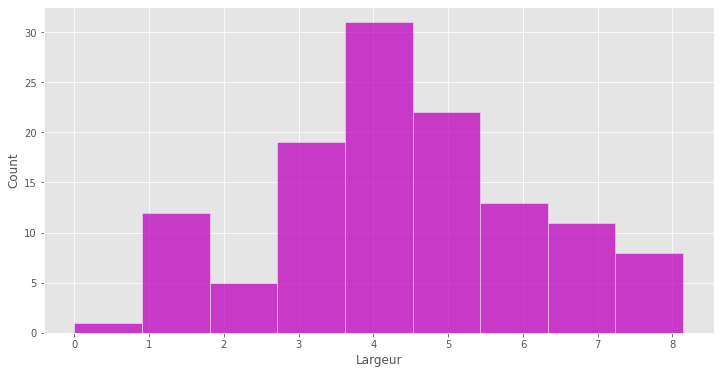

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(Train["Largeur"], color="m")
plt.show

also we notice that there is outliers in "Poids" column

<function matplotlib.pyplot.show(close=None, block=None)>

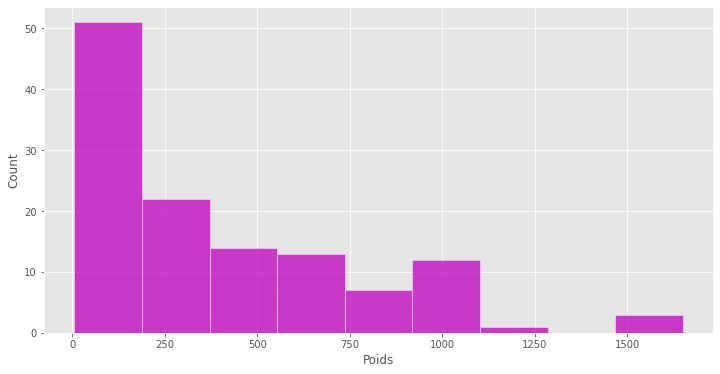

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(Train["Poids"], color="m")
plt.show

In [16]:
for i in range(123):
    if (Train.iloc[i]['Poids'] > 1100 )and (Train.iloc[i]['Poids'] <1600 ):
         print(i)

53
83


__Visualization of categorical data__

<function matplotlib.pyplot.show(close=None, block=None)>

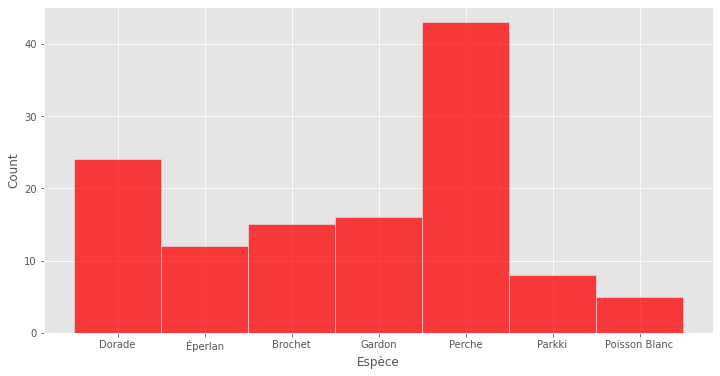

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(Train["Espèce"], color="red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

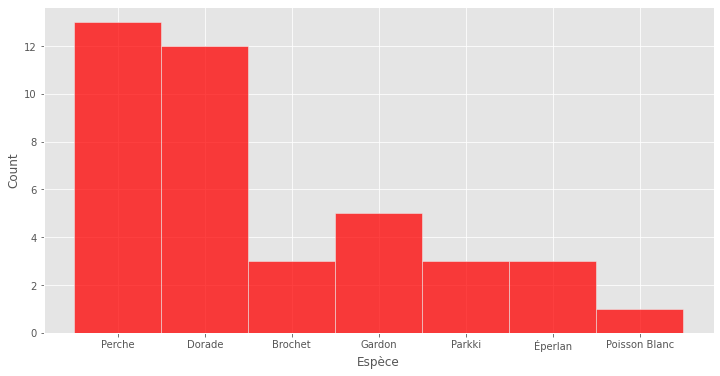

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(Test["Espèce"], color="red")
plt.show

__we notice that that data unbalanced which will cause some problem in the performance of the model, it may not recognize ever "Poisson Blan" or "Eperlan" or "Parkki" because their number is too small__


__the distribtion of data seems to be log_Normal or Chi-Squared__ 

In [19]:
mostlongerVer=Train.groupby("Espèce").LongueurVer.max()
mostlongerDia=Train.groupby("Espèce").LongueurDia.max()
mostlongerCro=Train.groupby("Espèce").LongueurCro.max()
mosthigher=Train.groupby("Espèce").Hauteur.max()
mostlarger=Train.groupby("Espèce").Largeur.max()

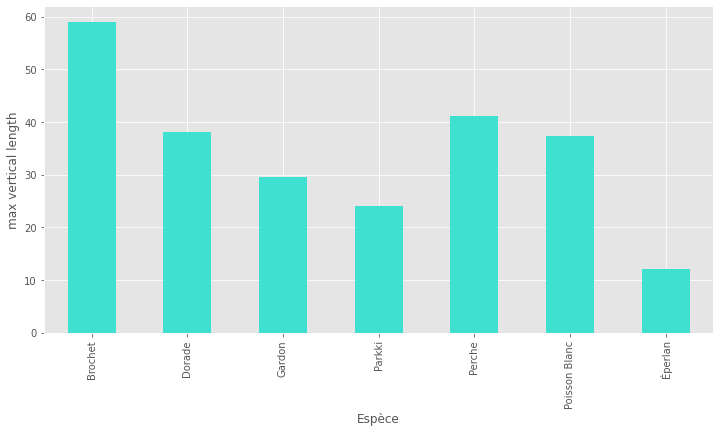

In [20]:
plt.figure(figsize=(12,6))
plt.ylabel("max vertical length")
mostlongerVer.plot(kind="bar", color="turquoise")
plt.show()

here we notice that that brochet has the most longer vertical length

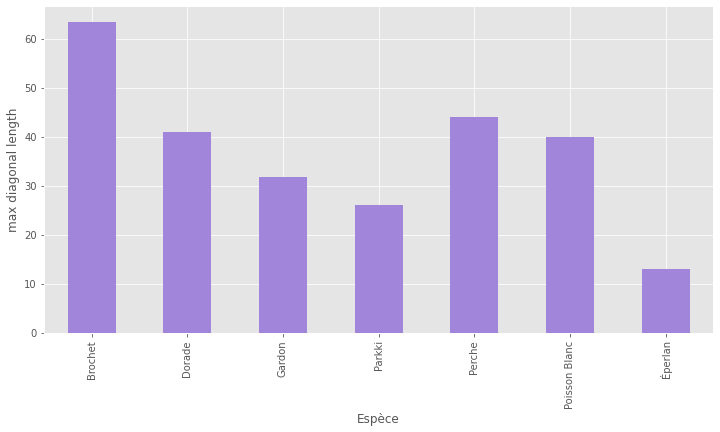

In [21]:
plt.figure(figsize=(12,6))
plt.ylabel("max diagonal length")
mostlongerDia.plot(kind="bar", color="#A085DB")
plt.show()

also here brochet has the most longer diagonal length  

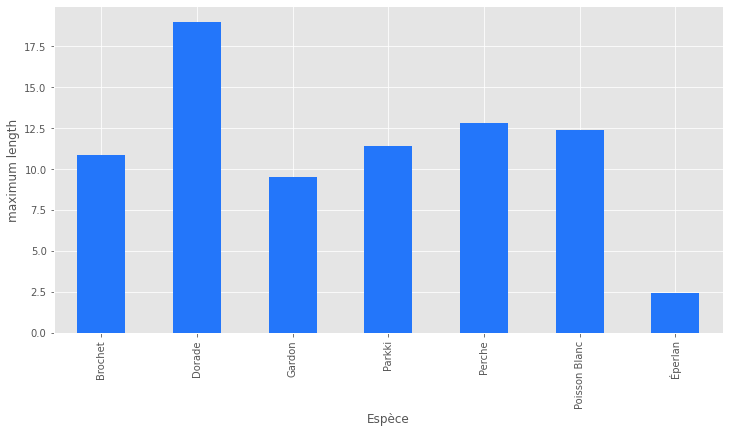

In [22]:
plt.figure(figsize=(12,6))
plt.ylabel("maximum length")
mosthigher.plot(kind="bar", color="#2376FA")
plt.show()

here we notice that Dorade has  the maximum length

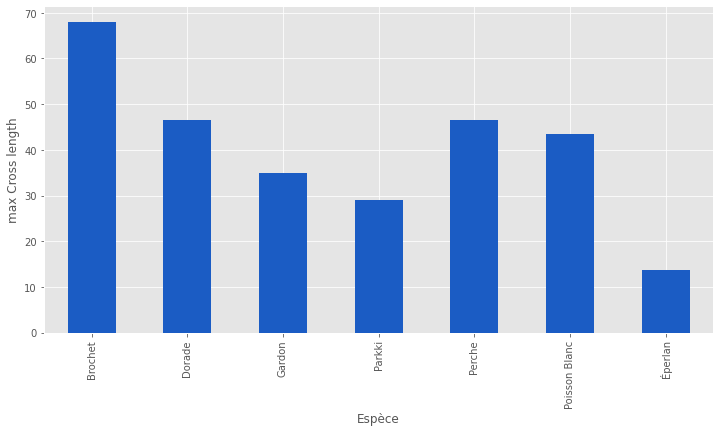

In [23]:
plt.figure(figsize=(12,6))
plt.ylabel("max Cross length")
mostlongerCro.plot(kind="bar", color="#1B5CC4")
plt.show()

and here we see that Brochet has the longest Cross length

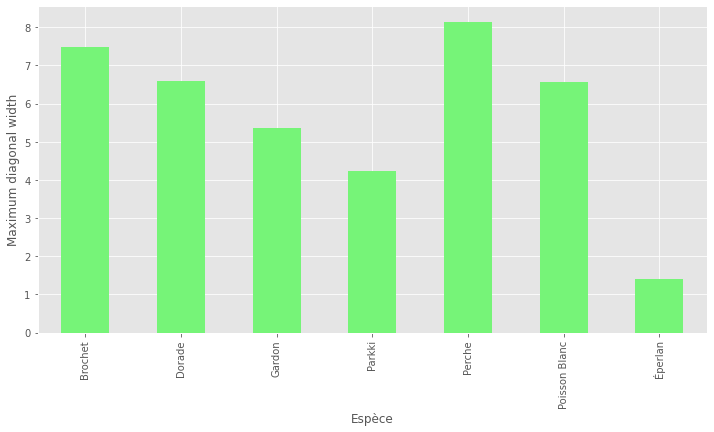

In [24]:
plt.figure(figsize=(12,6))
plt.ylabel("Maximum diagonal width")
mostlarger.plot(kind="bar", color="#76F478")
plt.show()

Perche has the maximum diagonal width 

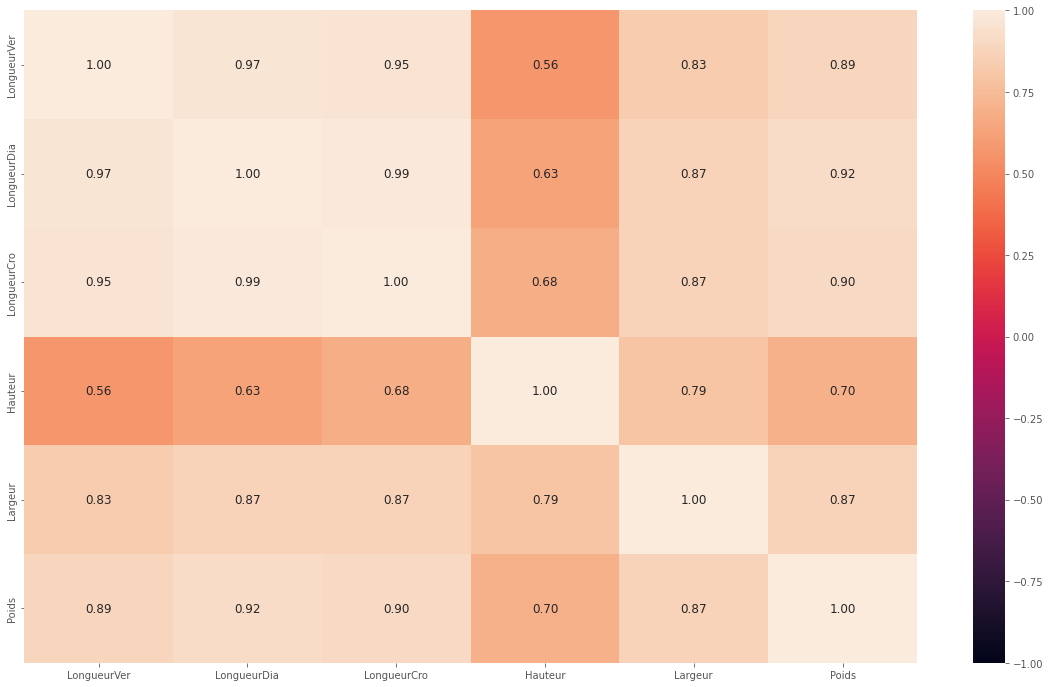

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(Train[numerical].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.show()

__we notice that the dependancy between features is important__

# Encoding

![](https://www.renom.jp/notebooks/tutorial/preprocessing/category_encoding/renom_cat_ordinal.png)

In [26]:
import category_encoders as ce
ordenc=ce.OrdinalEncoder(cols=['Espèce'])
Train=ordenc.fit_transform(Train)
Test=ordenc.fit_transform(Test)

# Treat Missing Value

In [27]:
Train.isna().sum()

Espèce         0
LongueurVer    1
LongueurDia    2
LongueurCro    0
Hauteur        1
Largeur        1
Poids          0
dtype: int64

# Multivariate Imputation By Chained Equations (MICE)

__we gonna use this genius method to fill the missing data__
i will leave this link for more explanation (https://www.youtube.com/watch?v=WPiYOS3qK70)

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [29]:
estimator=RandomForestRegressor(max_depth=8)
mice = IterativeImputer(estimator=estimator,random_state=11,skip_complete=True)

In [30]:
impdata=mice.fit_transform(Train)
impdata=pd.DataFrame(impdata,columns=Train.columns)

In [31]:
impdata.isnull().sum()


Espèce         0
LongueurVer    0
LongueurDia    0
LongueurCro    0
Hauteur        0
Largeur        0
Poids          0
dtype: int64

In [32]:
Test=Test.drop("ID",axis=1)

__Drop outliers__

In [33]:

impdata.drop([83,53],axis=0)

,Espèce,LongueurVer,LongueurDia,LongueurCro,Hauteur,Largeur,Poids
0,1.0,30.90,33.500,38.6,15.633000,5.133800,610.0
1,2.0,9.30,9.800,10.8,1.738800,1.047600,6.7
2,3.0,48.30,51.700,55.1,8.926200,6.171200,950.0
3,4.0,17.50,18.800,21.2,5.575600,2.904400,78.0
4,5.0,19.00,21.000,22.5,5.692500,3.555000,110.0
...,...,...,...,...,...,...,...
118,5.0,32.00,34.500,36.5,10.256500,6.387500,556.0
119,1.0,0.00,33.500,38.6,15.633000,5.133800,570.0
120,2.0,9.30,9.800,0.0,1.738800,1.110196,5.7
121,3.0,46.36,50.102,55.1,8.926200,6.171200,400.0


# Modeling

__Linear_Regression__

In [34]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
X=impdata.drop(["Poids"], axis=1)
Y=impdata["Poids"]

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [36]:
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest, ypred))

143.4686622857003

here we notice that the error is hight

__Evaluation by cross_val_score__

In [37]:
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(LR, xtrain, ytrain, cv=5)
cvscore

array([ 0.65571763,  0.89587002,  0.83064912, -2.45775488,  0.70309682])

In [38]:
cvscore.mean()

0.12551574226102197

In [39]:
cvscore.std()

1.2945006638322303

Score= 0.58 +- 0.36

it's a bad model 

__Lasso__

In [40]:
from sklearn.linear_model import Lasso
Ls=Lasso()
Ls.fit(xtrain,ytrain)
ypredd=Ls.predict(xtest)
np.sqrt(mean_squared_error(ytest, ypredd))

143.82837329673097

In [41]:
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(Ls, xtrain, ytrain, cv=5)
cvscore

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144292.62516429042, tolerance: 1000.8816603037978
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414758.1270861208, tolerance: 1238.4303647341774
  positive)


array([ 0.65494474,  0.89547502,  0.83197352, -0.54839783,  0.83302704])

In [42]:
cvscore.mean()

0.5334044991971576

In [43]:
cvscore.std()

0.5468236465393115

score=0.30 +- 0.9 

the error getting bigger , it's a bad model

__DecisionTreeRegressor__

In [44]:
from sklearn.tree import DecisionTreeRegressor
mytre=DecisionTreeRegressor()
mytre.fit(xtrain,ytrain)
ypreeed=mytre.predict(xtest)
np.sqrt(mean_squared_error(ytest, ypreeed))

69.51693606596885

__here we are going to play a little bit with hyperparametre of the decision_tree_regressor__ 

![](https://d3i71xaburhd42.cloudfront.net/dd63caefa19ef740a3193f638c14ad5540981d34/2-Table1-1.png)

In [45]:
from sklearn.tree import DecisionTreeRegressor
mytre=DecisionTreeRegressor(max_depth=5,min_samples_split=3)
mytre.fit(xtrain,ytrain)
ypreeed=mytre.predict(xtest)
np.sqrt(mean_squared_error(ytest, ypreeed))

92.3314682425259

__we notice that win minimize the error__ 

Let's play again

In [46]:
from sklearn.tree import DecisionTreeRegressor
mytree=DecisionTreeRegressor(max_depth=4,min_samples_leaf=2, min_samples_split=5)
mytree.fit(xtrain,ytrain)
preed=mytree.predict(xtest)
np.sqrt(mean_squared_error(ytest, preed))

83.24451590053357